STOCK MARKET PREDICTION AND FORRCASTING USING STACKED LTSM


In [3]:

import pandas as pd

In [4]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1.shape

(2035,)

In [8]:
df1[2035:]


Series([], Name: Close, dtype: float64)

In [9]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

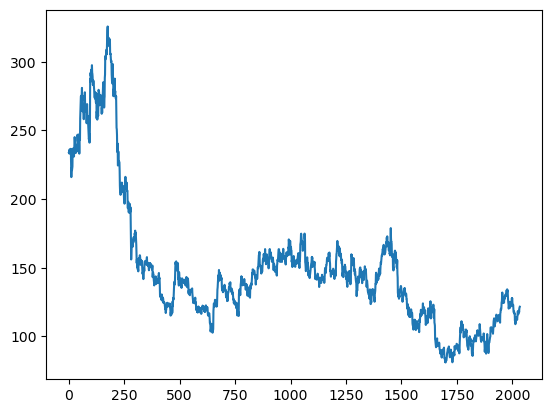

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSM are sensitive to the scale of the data. so we apply MinMax scaler

In [11]:
import numpy as np

In [12]:
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(2035, 1)

TRAINING AND TESTING DATA

In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size

1322

In [17]:
test_size

713

In [18]:
len(train_data),len(test_data)

(1322, 713)

In [19]:
import numpy
#converting an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [20]:
#reshaping into X=t,t+1,t+2,t+3 and Y=t+4
time_step= 100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [21]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [22]:
print(X_test.shape),print(Y_test.shape)

(612, 100)
(612,)


(None, None)

In [23]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape)

In [24]:
#Create the stacked LTSM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [25]:
model=Sequential()
model.add(LTSM(50,return_sequences=True,input_shape=(100,1)))
model.add(LTSM(50,return_sequences=True))
model.add(LTSM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Sequential' is not defined

In [26]:
model.summary()

NameError: name 'model' is not defined

In [27]:
X_train[:100]

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.83455882],
        [0.86213235],
        [0.85273693],
        ...,
        [0.84109477],
        [0.8306781 ],
        [0.83129085]],

       [[0.86213235],
        [0.85273693],
        [0.87111928],
        ...,
        [0.8306781 ],
        [0.83129085],
        [0.84497549]],

       [[0.85273693],
        [0.87111928],
        [0.84497549],
        ...,
        [0.83129085],
        [0.84497549],
        [0.8880719 ]]])

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

NameError: name 'model' is not defined

In [29]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [38]:
tf._version_

NameError: name 'tf' is not defined

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

NameError: name 'model' is not defined

In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

NameError: name 'train_predict' is not defined

In [31]:
# Calculate RMSE performanvce matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))


NameError: name 'train_predict' is not defined

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

In [47]:
### Plotting 
# Shift train predictions for plotting 
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting
testPredictPlot=numoy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and predictions
plt.plot(scanner.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

NameError: name 'train_predict' is not defined

In [34]:
   441-100

341

In [35]:
len(test_data)

713

In [36]:
X_input=test_data[341:].reshape(1,-1)
X_input.shape

(1, 372)

In [ ]:
X_input=test_data[341:].reshape(-1,1)

In [48]:
X_input.shape

(1, 372)

In [37]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [49]:
   # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

ValueError: cannot reshape array of size 371 into shape (1,100,1)

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

2035

ValueError: x and y must have same first dimension, but have shapes (100,) and (877, 1)

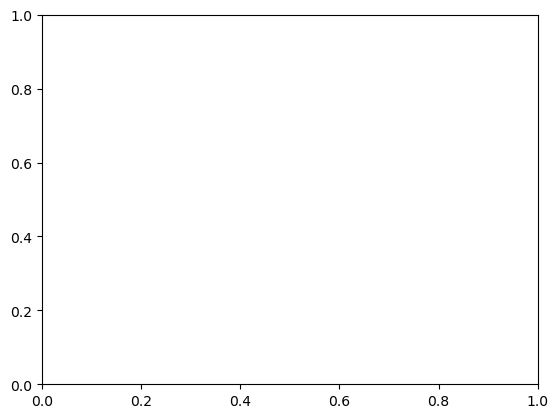

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


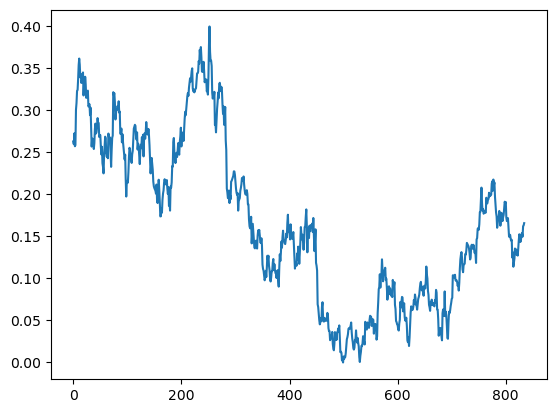

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

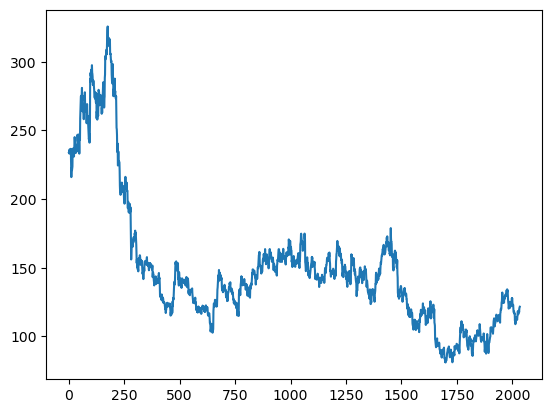

In [46]:
plt.plot(df3)